In [1]:
from neuralnet import *
from dataloader import *
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
# prepare small data
c = load_config('config.yaml')
d = DataLoader() # data loader does everything for u




X = d.X_train
y = d.y_train


X_val = d.X_val
y_val = d.y_val

# ind=np.random.randint(low =0, high = d.X_train.shape[0], size = 500)
# X = d.X_train[ind, :]
# y = d.y_train[ind]
# ind=np.random.randint(low =0, high = 5000, size = 30)
# X_val = d.X_val[ind, :]
# y_val = d.y_val[ind]





In [2]:
test_dict = {} # to record test performance
val_dict = {}
train_dict = {}

epoch0, val=0.2152, train_acc=0.15233333333333332
epoch20, val=0.1, train_acc=0.09728888888888888
epoch40, val=0.1, train_acc=0.09666666666666666
epoch60, val=0.1, train_acc=0.09886666666666667
epoch80, val=0.1, train_acc=0.09695555555555556


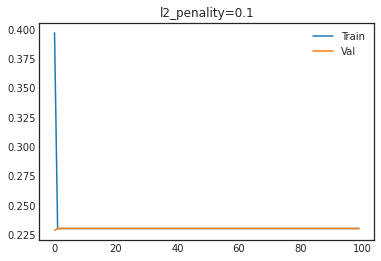

epoch0, val=0.1, train_acc=0.1014
epoch20, val=0.1, train_acc=0.10068888888888888
epoch40, val=0.1, train_acc=0.10057777777777778
epoch60, val=0.1, train_acc=0.09955555555555555
epoch80, val=0.1, train_acc=0.09737777777777777
epoch100, val=0.1, train_acc=0.10237777777777778
epoch120, val=0.1, train_acc=0.10144444444444445
epoch140, val=0.1, train_acc=0.10206666666666667


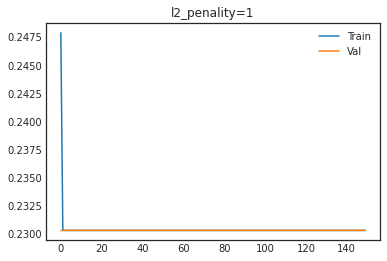

In [9]:
# try different regularization
import pandas as pd
c = load_config('config.yaml')
for l2_pen in [10**(-1), 1]:
#for l2_pen in [1]:
    regularized_config = c.copy()
    c['epochs'] = 150
    c['learning_rate'] = 0.05
    regularized_config['L2_penalty']=l2_pen
    
    nn =  Neuralnetwork(regularized_config)
    #nn.batch_size = 50 # small batch size will not yeild nan
    tloss, vloss, tacc, vacc = train(nn, X, y, X_val,y_val,c)
    
    # plot curve
    plt.plot(np.array(tloss), label = 'Train')
    plt.plot(np.array(vloss), label = 'Val')
    plt.legend()
    plt.title(f'l2_penality={l2_pen}')
    plt.savefig(f'Loss_curve_L2_momentum{l2_pen}.png')
    plt.show()
    
    # save performance
    performance = pd.DataFrame([tloss, vloss, tacc, vacc], index = ['train_loss', 'val_loss', 'train_acc', 'vacc']).T
    performance.to_csv(f'Acc_curve_L2_momentum{l2_pen}.csv')
    
    # save test performance
    test_dict[l2_pen]=test(nn, d.X_test, d.y_test)
    val_dict[l2_pen]=vacc[-1]
    train_dict[l2_pen]=tacc[-1]
    

In [10]:
perf = pd.DataFrame([test_dict, train_dict, val_dict]).T
perf.reset_index(inplace=True)
perf.columns = ['L2 penality', 'test accuracy', 'train accuracy', 'val accuracy']

In [11]:
print(perf.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  L2 penality &  test accuracy &  train accuracy &  val accuracy \\
\midrule
0 &       0.0001 &         0.2707 &        0.313644 &        0.2672 \\
1 &       0.0010 &         0.4364 &        0.462667 &        0.4424 \\
2 &       0.0100 &         0.2462 &        0.248422 &        0.2458 \\
3 &       0.1000 &         0.1000 &        0.099911 &        0.1000 \\
4 &       1.0000 &         0.1000 &        0.100733 &        0.1000 \\
\bottomrule
\end{tabular}



In [12]:
perf

,L2 penality,test accuracy,train accuracy,val accuracy
0,0.0001,0.2707,0.313644,0.2672
1,0.0010,0.4364,0.462667,0.4424
2,0.0100,0.2462,0.248422,0.2458
3,0.1000,0.1000,0.099911,0.1000
4,1.0000,0.1000,0.100733,0.1000


In [17]:
perf.to_csv('reg_.csv')

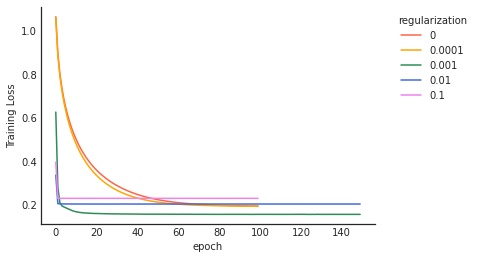

In [18]:
# plot in same
import seaborn as sns
f,ax = plt.subplots()
l2pens =  [0,10**(-4), 10**(-3), 10**(-2), 10**(-1)]
colors = ['tomato', 'orange', 'seagreen', 'royalblue', 'violet']
for l2_pen, c in zip(l2pens, colors):
    performance=pd.read_csv(f'Acc_curve_L2_momentum{l2_pen}.csv')
    
    performance['train_loss'].plot(label = f'{l2_pen}', ax = ax, c = c)
    #performance['val_loss'].plot(label = f'{l2_pen}_val', ax = ax, c = c, marker = '+')
plt.legend(title = 'regularization', bbox_to_anchor=(1.3,1))
plt.xlabel('epoch')
plt.ylabel('Training Loss')

sns.despine()

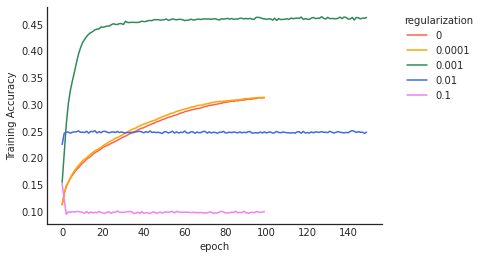

In [19]:
# plot in same
import seaborn as sns
f,ax = plt.subplots()
#l2pens =  [0,10**(-4), 10**(-3), 10**(-2), 10**(-1), 1]
colors = ['tomato', 'orange', 'seagreen', 'royalblue', 'violet']
for l2_pen, c in zip(l2pens, colors):
    performance=pd.read_csv(f'Acc_curve_L2_momentum{l2_pen}.csv')
    
    performance['train_acc'].plot(label = f'{l2_pen}', ax = ax, c = c)
    #performance['vacc'].plot(label = f'{l2_pen}_val', ax = ax, c = c, marker = '+')
plt.legend(title = 'regularization', bbox_to_anchor=(1.3,1))
plt.xlabel('epoch')
plt.ylabel('Training Accuracy')

sns.despine()

Text(0.5, 0, 'Epoch')

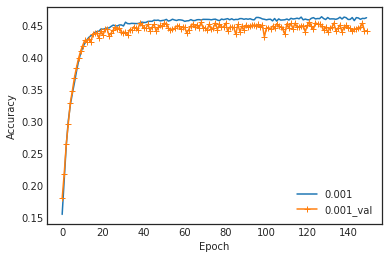

In [30]:
l2_pen = 0.001
f,ax = plt.subplots()
%matplotlib inline
performance=pd.read_csv(f'Acc_curve_L2_momentum{l2_pen}.csv')
    
performance['train_acc'].plot(label = f'{l2_pen}')
performance['vacc'].plot(label = f'{l2_pen}_val', marker = '+')

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

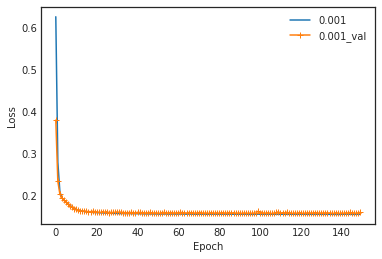

In [31]:
l2_pen = 0.001
f,ax = plt.subplots()
%matplotlib inline
performance=pd.read_csv(f'Acc_curve_L2_momentum{l2_pen}.csv')
    
performance['train_loss'].plot(label = f'{l2_pen}')
performance['val_loss'].plot(label = f'{l2_pen}_val', marker = '+')

plt.legend()
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [23]:
performance

,Unnamed: 0,train_loss,val_loss,train_acc,vacc
0,0,0.626737,0.380840,0.154667,0.1796
1,1,0.280627,0.235048,0.208000,0.2184
2,2,0.210433,0.204593,0.262600,0.2646
3,3,0.195796,0.195475,0.301333,0.2964
4,4,0.190538,0.189638,0.326156,0.3296
...,...,...,...,...,...
145,145,0.156457,0.159817,0.462267,0.4470
146,146,0.156552,0.159721,0.460133,0.4480
147,147,0.156485,0.159325,0.461622,0.4542
148,148,0.156681,0.159867,0.461400,0.4416
